In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
#Read_Data
df = pd.read_csv('/content/AirPassengers.csv')

In [10]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
#check datatypes
df.dtypes

Month          object
#Passengers     int64
dtype: object

In [11]:
#convert objects into date time format to work in Timeseries
df = pd.read_csv('/content/AirPassengers.csv', parse_dates= ['Month'])

In [13]:
df.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [16]:
df = pd.read_csv('/content/AirPassengers.csv',parse_dates=['Month'],index_col='Month')

In [17]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [21]:
# slice data of specific date and month
df['1949-04-01':'1950-03-01']

,#Passengers
Month,
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136
1949-10-01,119
1949-11-01,104
1949-12-01,118


In [27]:
df.loc['1949-08-01']

#Passengers    148
Name: 1949-08-01 00:00:00, dtype: int64

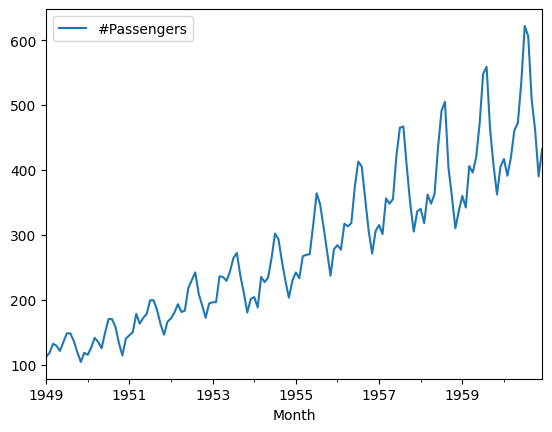

In [35]:
#plot the time series
df.plot()
plt.show()

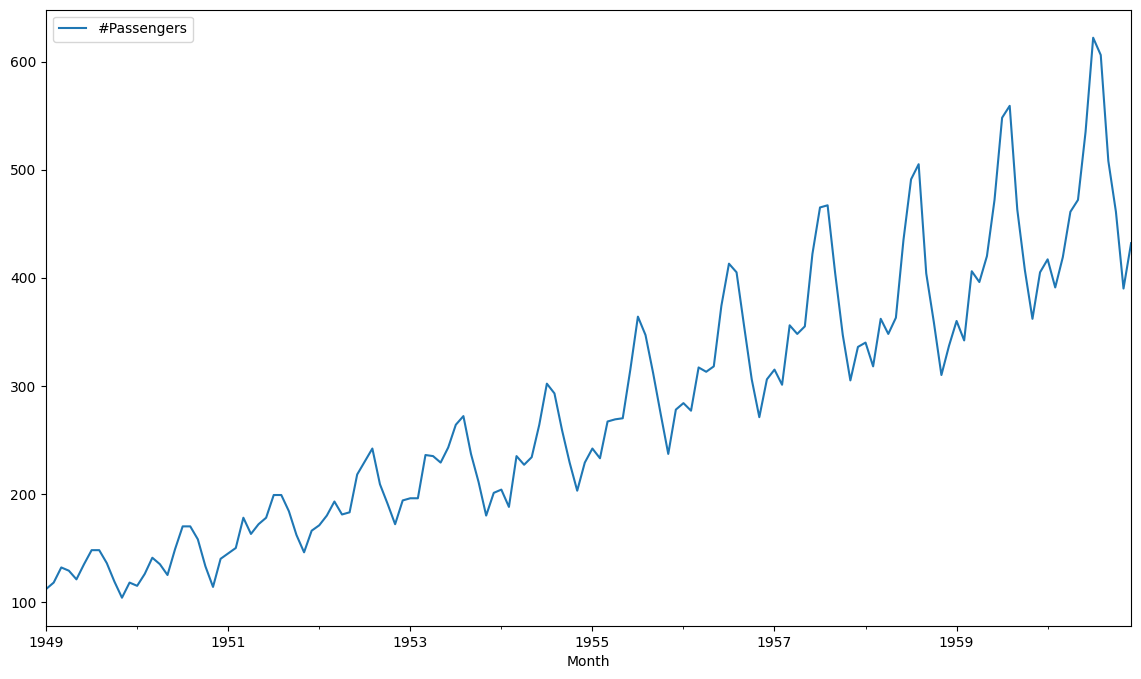

In [40]:
#Increase the FigureSize
from pylab import rcParams
rcParams['figure.figsize']=(14,8)
df.plot()
plt.show()

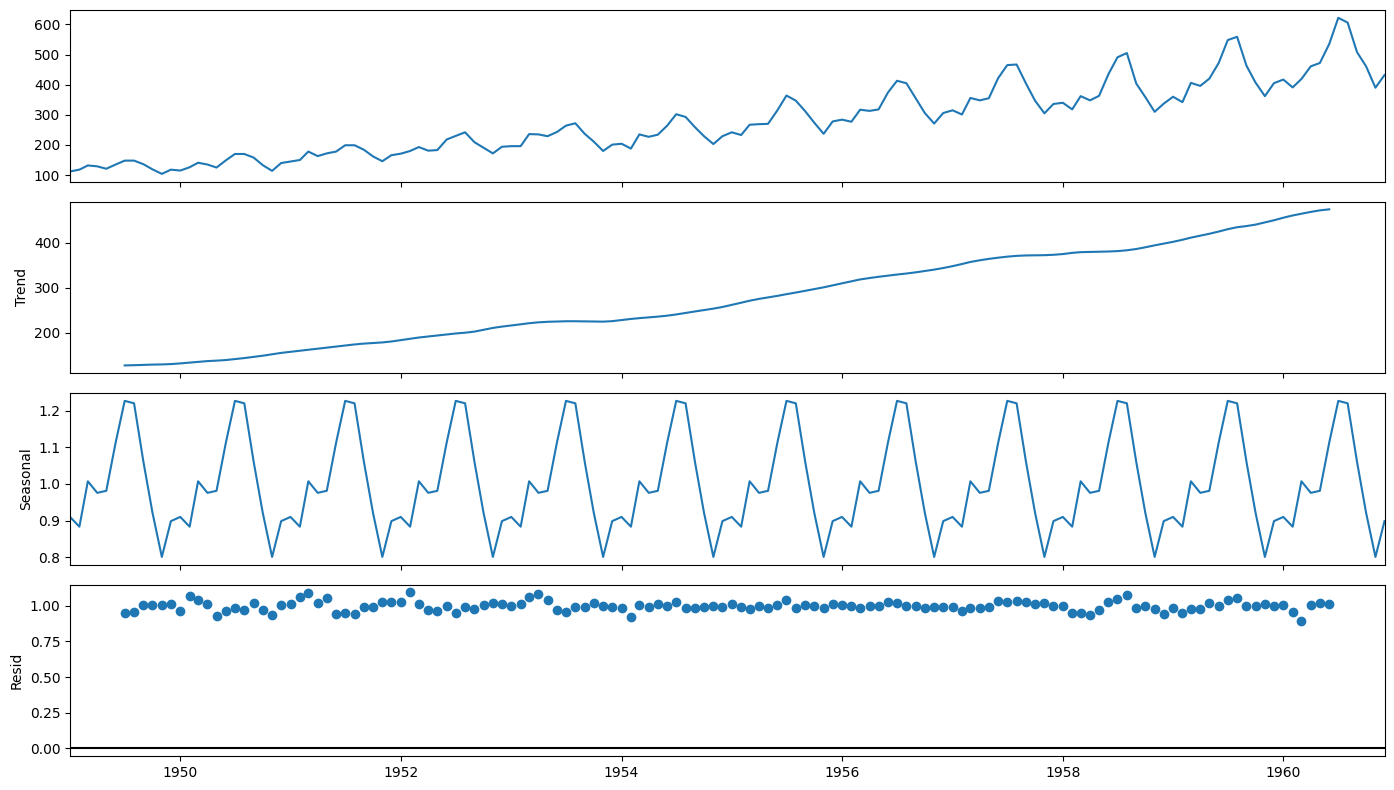

In [41]:
#Decompose the Time series Multiplicatively
df_mul_decompose = seasonal_decompose(df,model='multiplicative')
df_mul_decompose.plot()
plt.show()

In [42]:
#Let's try to do Log Transformation
df_log = df.copy()

In [51]:
df_log['pax'] = np.log(df)

In [52]:
df_log.pax

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: pax, Length: 144, dtype: float64

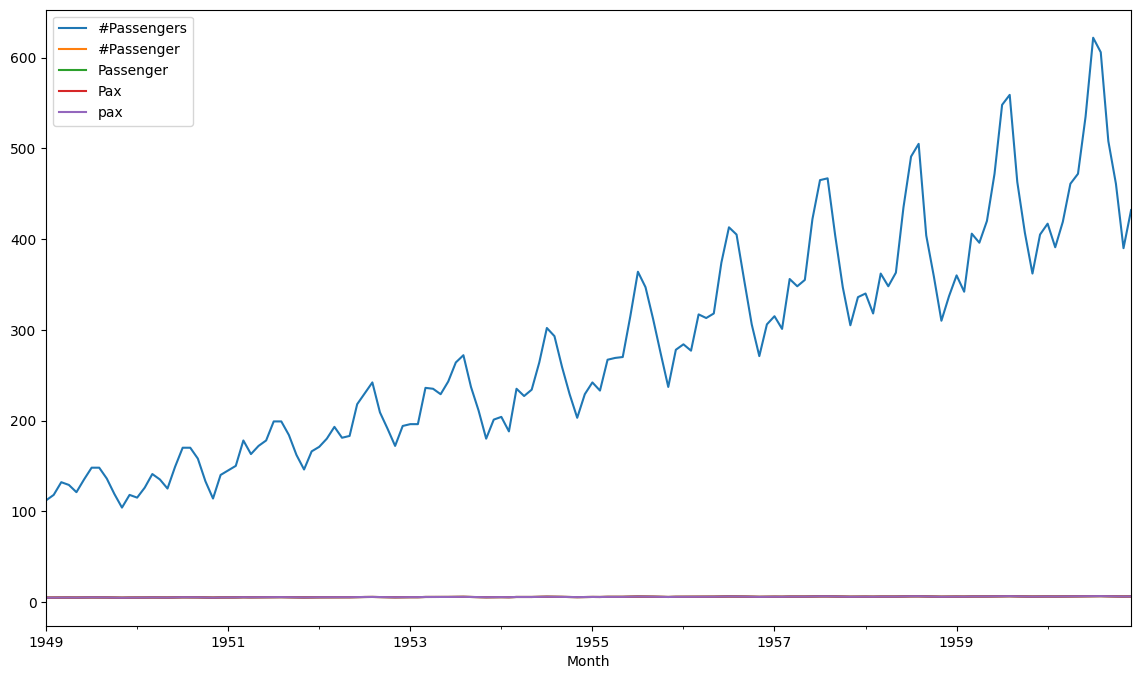

In [53]:
#visualize the log transfored series
df_log.plot()
plt.show()

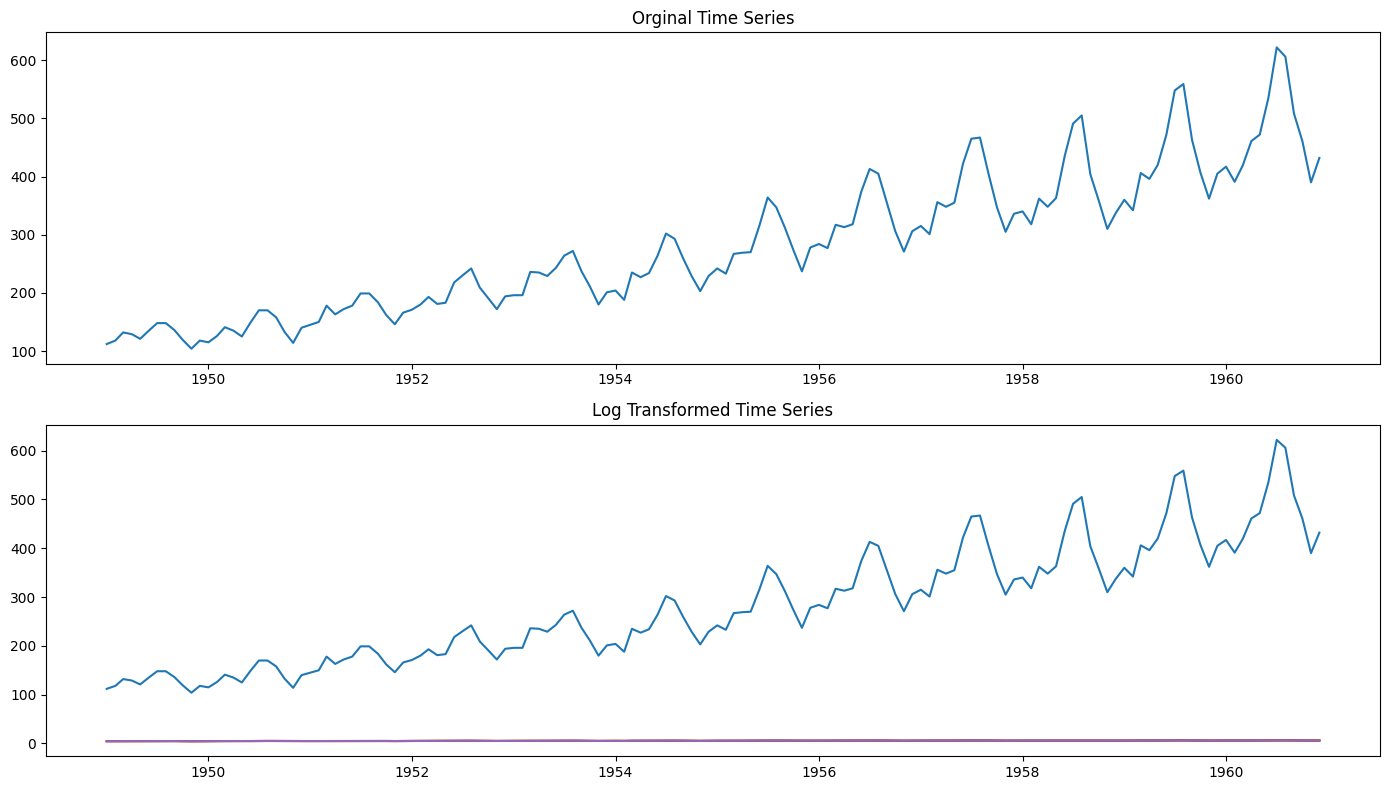

In [55]:
#compare with the original series
plt.subplot(2,1,1)
plt.title('Orginal Time Series')
plt.plot(df)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df_log)
plt.tight_layout()
